In [33]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts

In [34]:
fileId = '0022'

In [35]:
filepath = r'D:\Data\cs-8395-dl\assignment3\Training\img\img{}.nii.gz'.format(
    fileId)

In [36]:
img_nib = nib.load(filepath)

In [37]:
img_np =img_nib.get_fdata()

In [38]:
img_np.shape

(512, 512, 89)

In [39]:
img_np.size

23330816

In [40]:
img_np.dtype

dtype('float64')

In [41]:
img_np.max(), img_np.min(), img_np.mean(), np.median(img_np)

(2585.0, -3024.0, -965.9304467962029, -879.0)

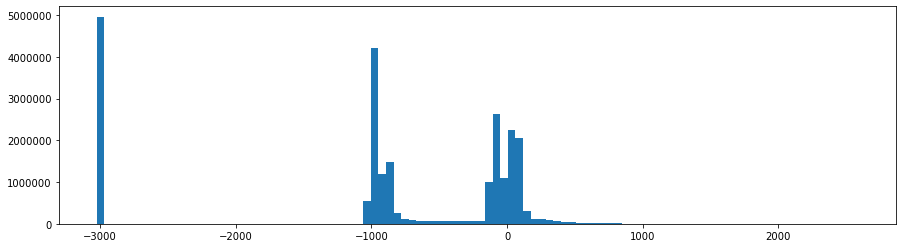

In [42]:
plt.figure(figsize=(15,4))
_=plt.hist(img_np.ravel(),bins=100)

In [43]:
bg = -1000

In [44]:
img_np[img_np>300]=bg
img_np[img_np<-100]=bg

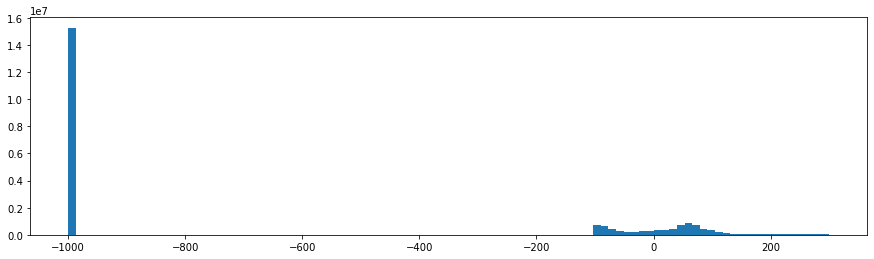

In [45]:
plt.figure(figsize=(15,4))
_=plt.hist(img_np.ravel(),bins=100)

In [46]:
img_np_norm = (img_np-img_np.min())/(img_np.max()-img_np.min())

In [47]:
img_np_norm.max(), img_np_norm.min(), img_np_norm.mean(), np.median(img_np_norm)

(1.0, 0.0, 0.27090157778384616, 0.0)

In [48]:
img_np_norm_tr=img_np_norm.transpose((2,0,1))

In [49]:
filepath_label = r'D:\Data\cs-8395-dl\assignment3\Training\label\label{}.nii.gz'.format(fileId)
label_nib = nib.load(filepath_label)

In [50]:
label_np = label_nib.get_fdata()

In [51]:
label_np.shape

(512, 512, 89)

In [52]:
label_np.max(), label_np.min(), np.unique(label_np.ravel())

(13.0,
 0.0,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]))

In [53]:
label_np_tr = label_np.transpose((2,0,1))
label_np_tr.shape

(89, 512, 512)

50


d:\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


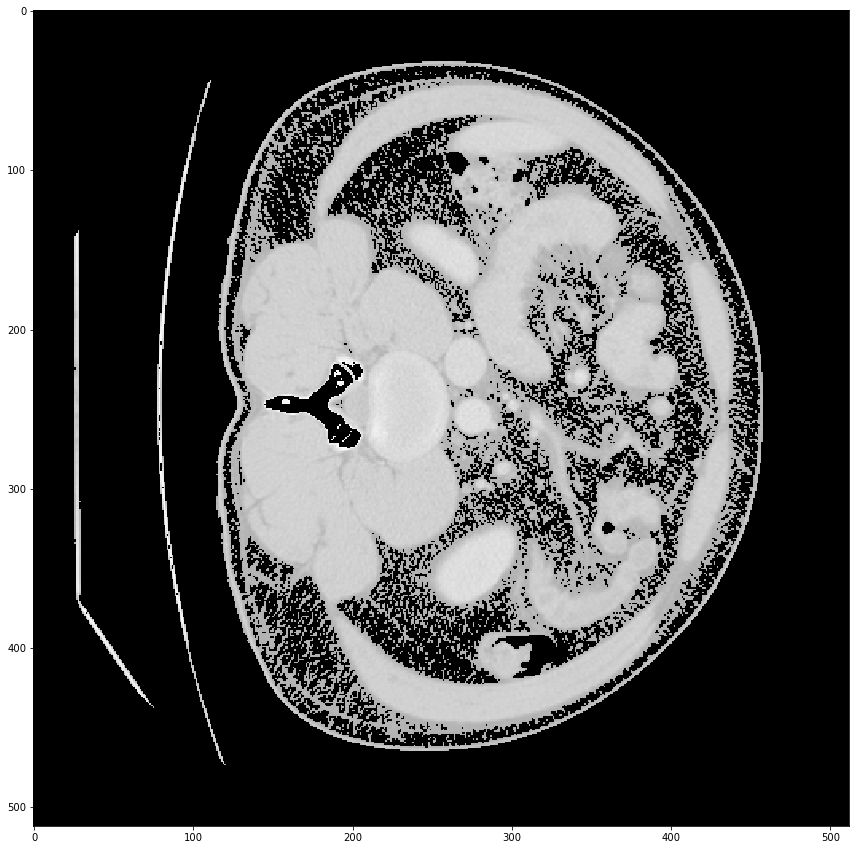

51


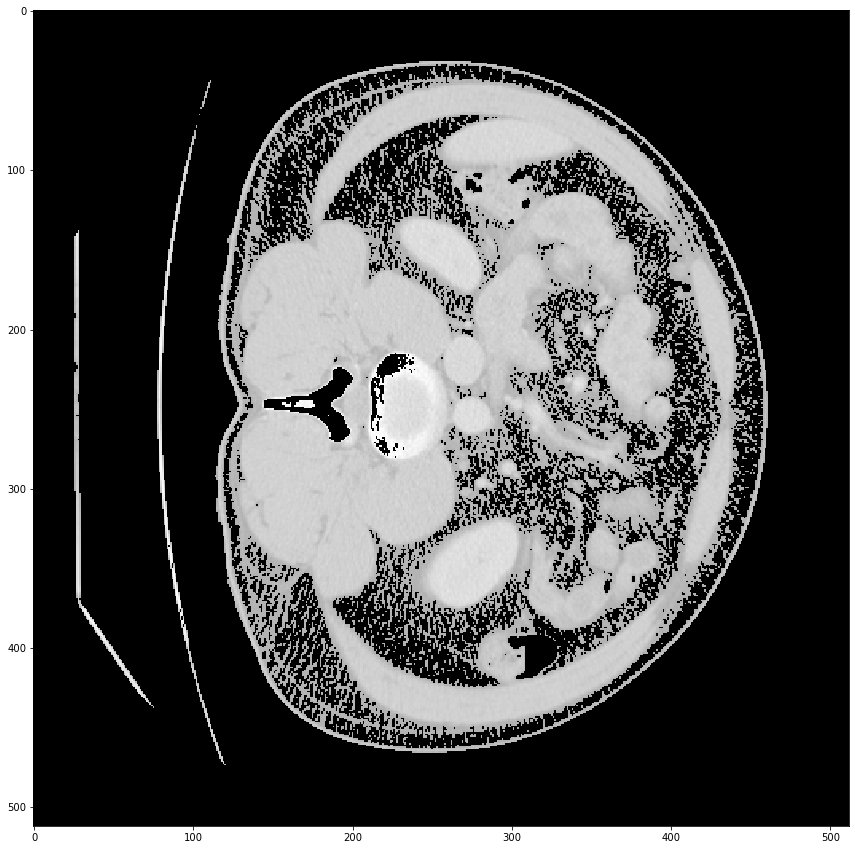

52


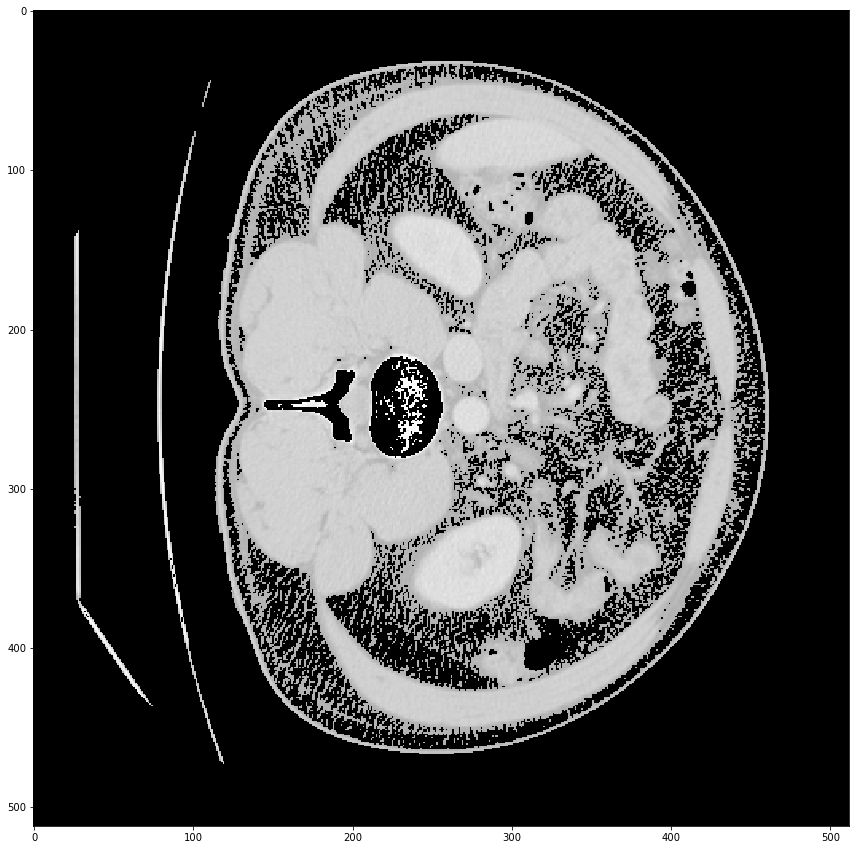

53


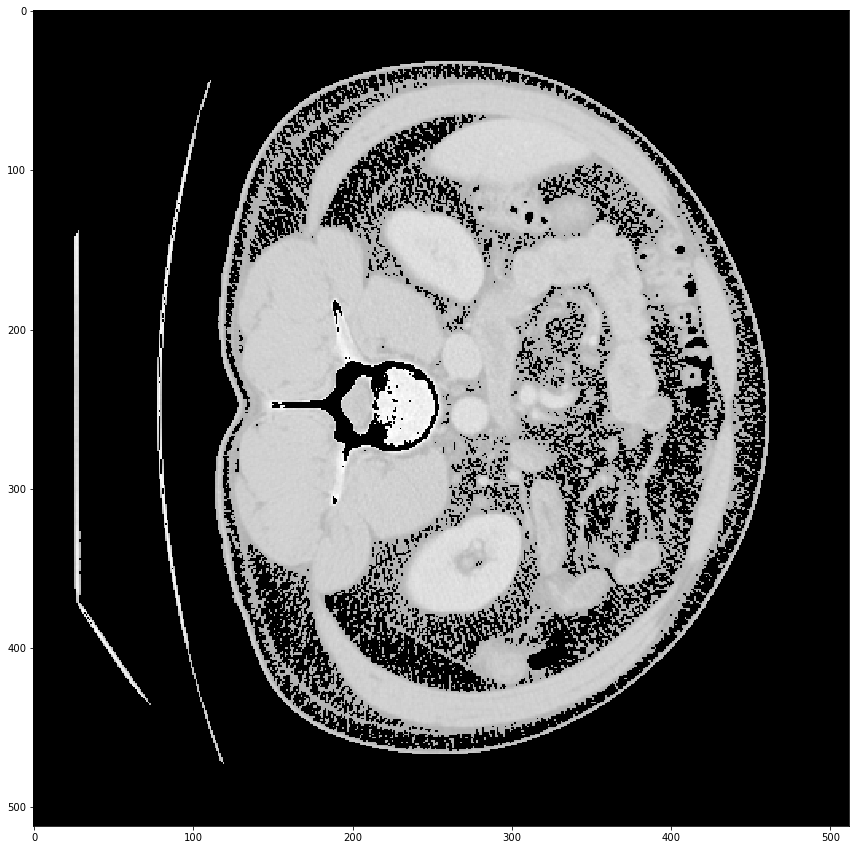

54


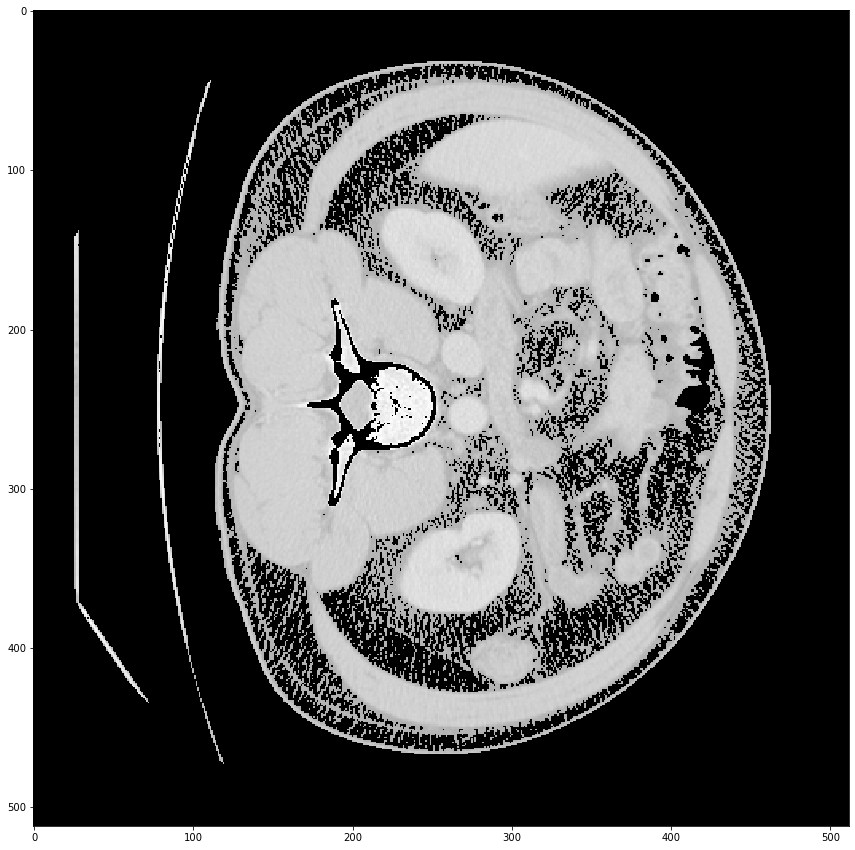

55


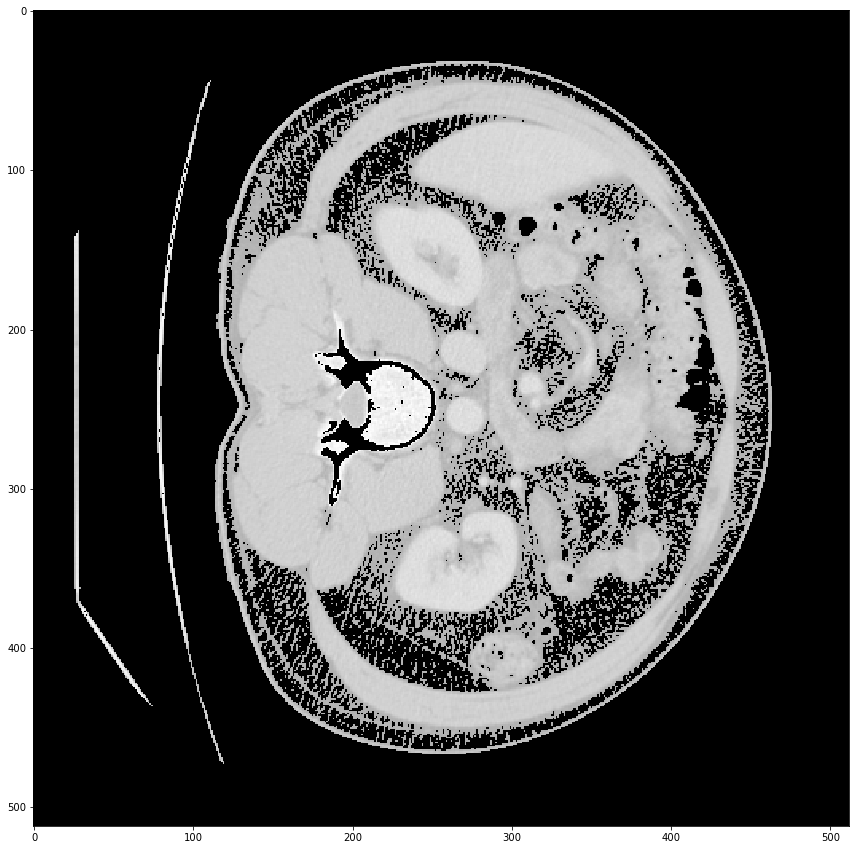

56


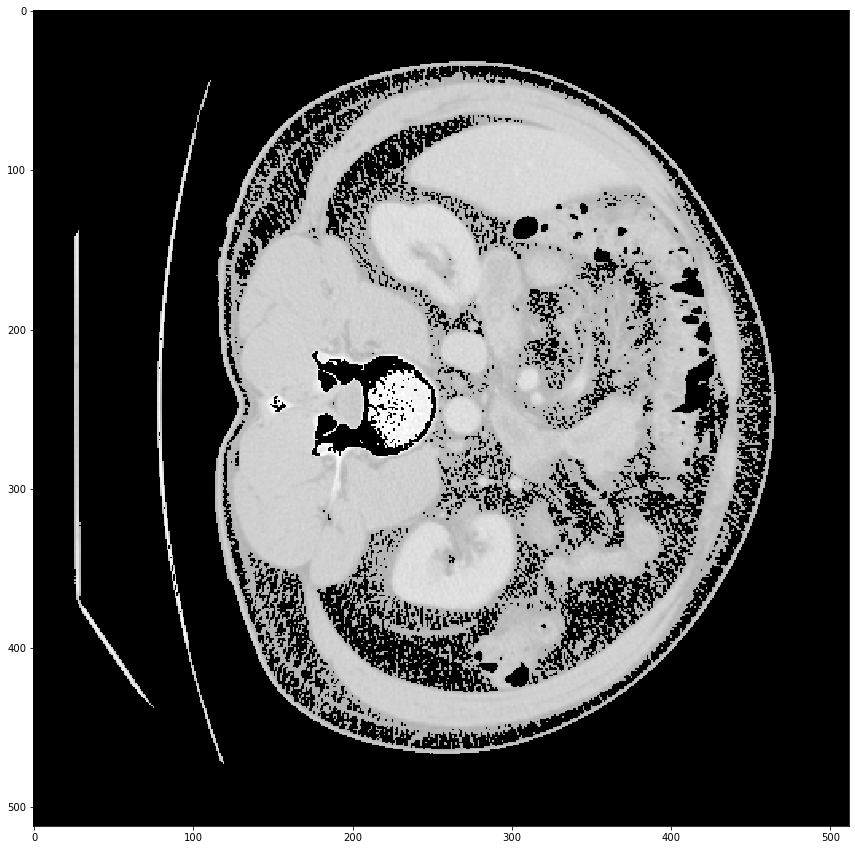

57


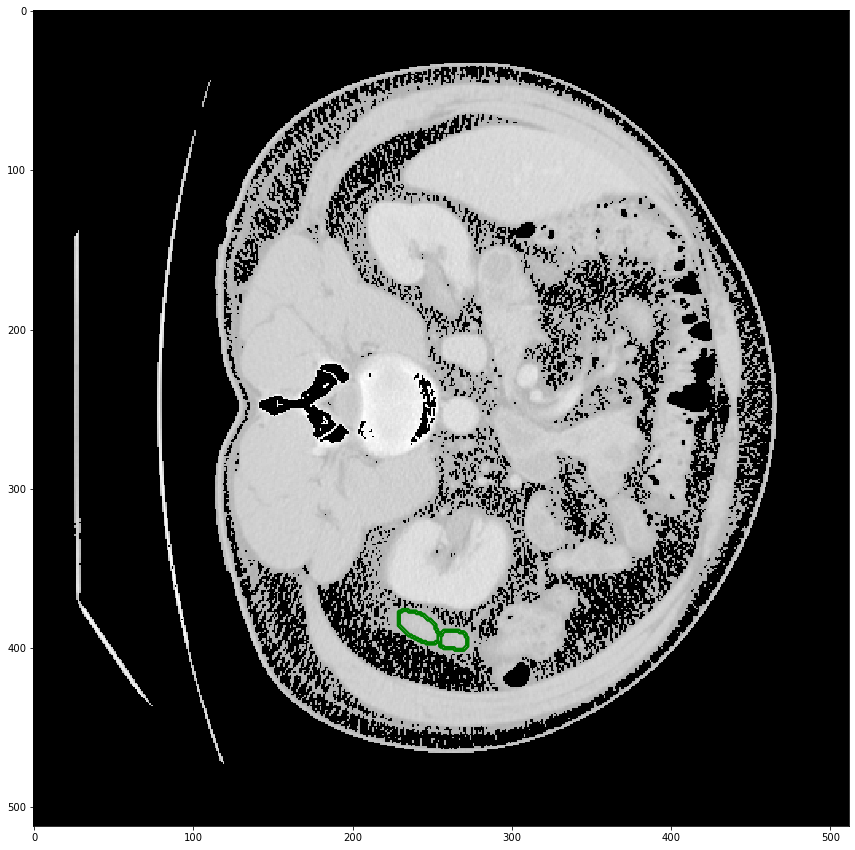

58


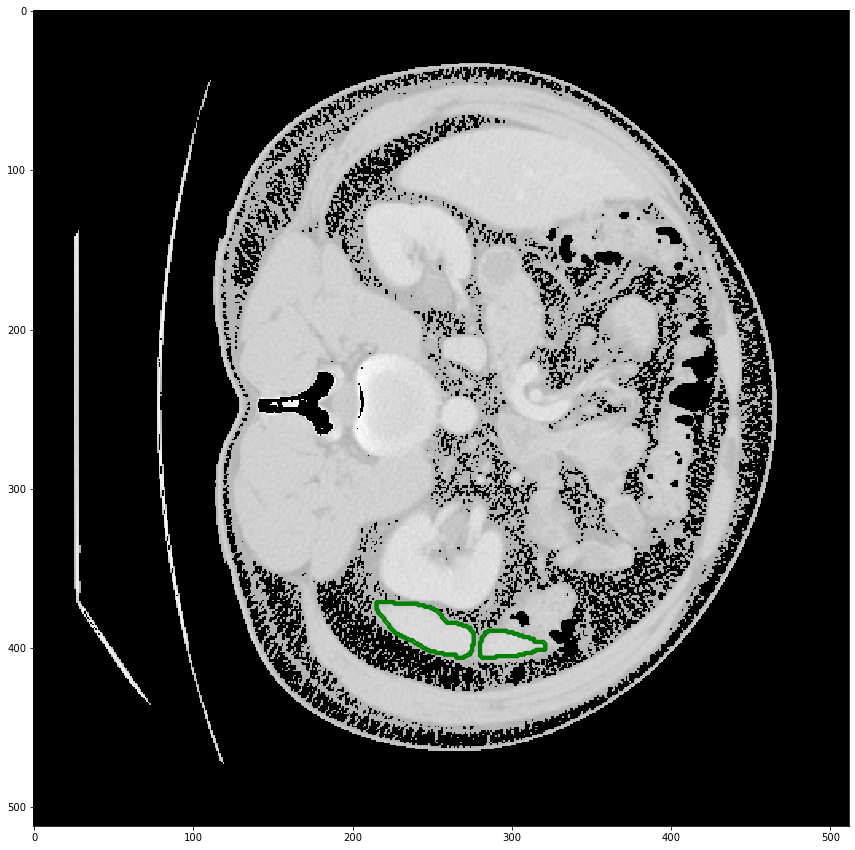

59


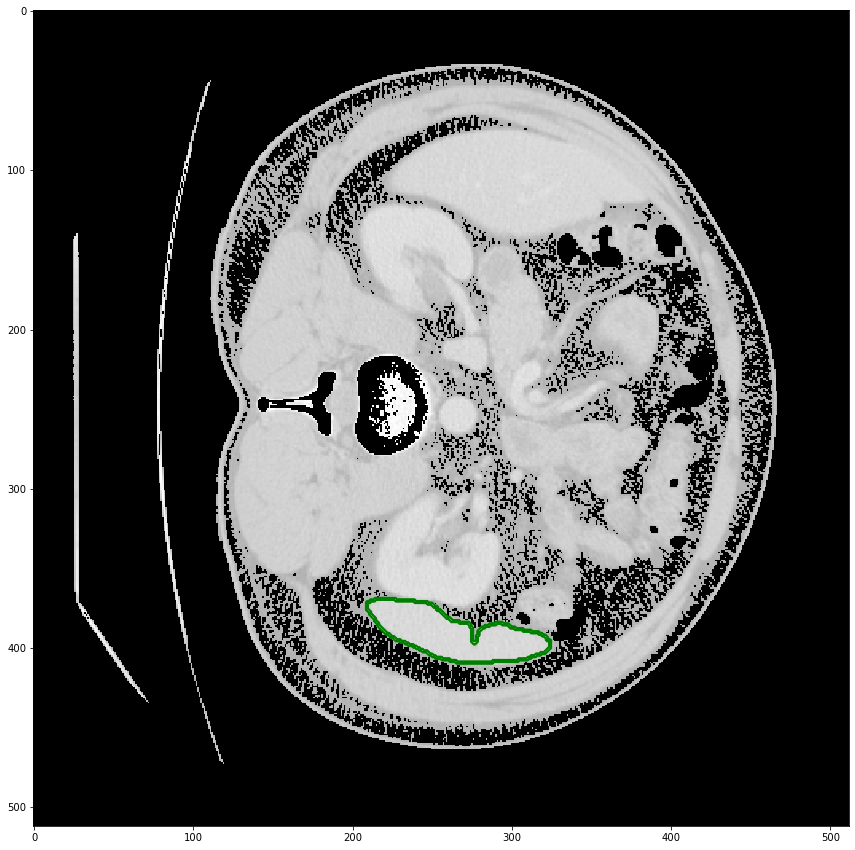

60


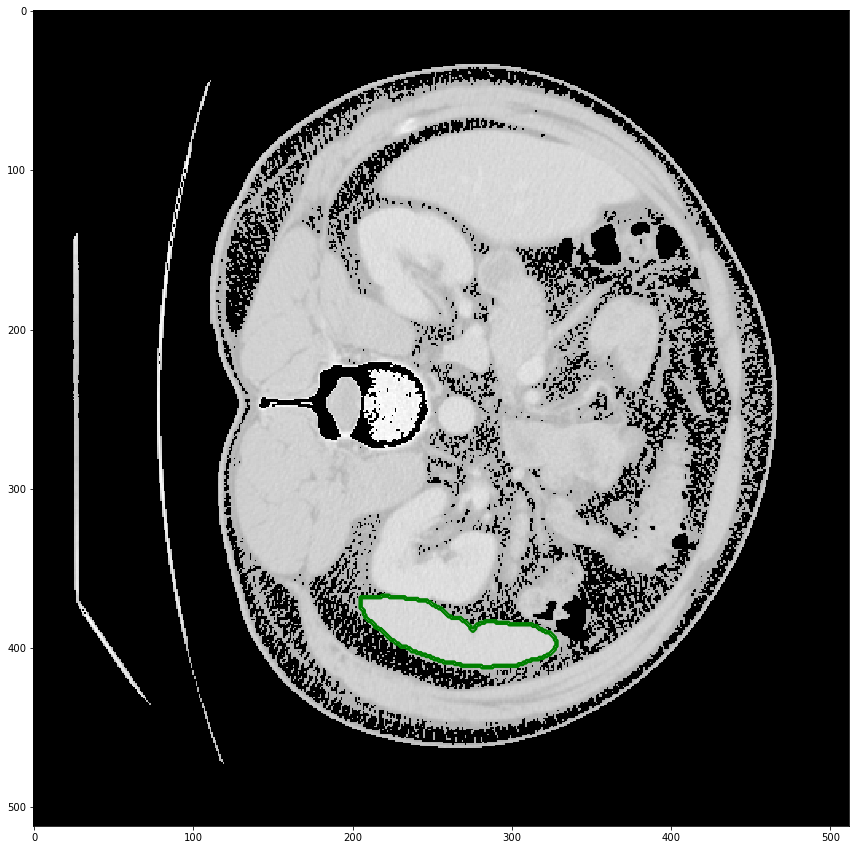

61


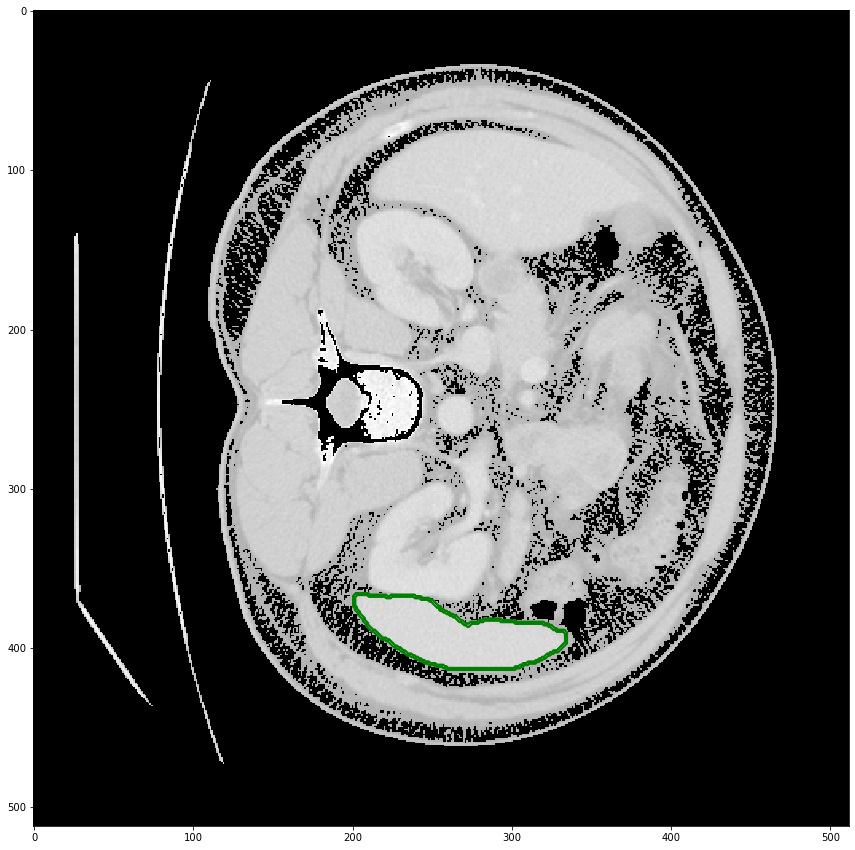

62


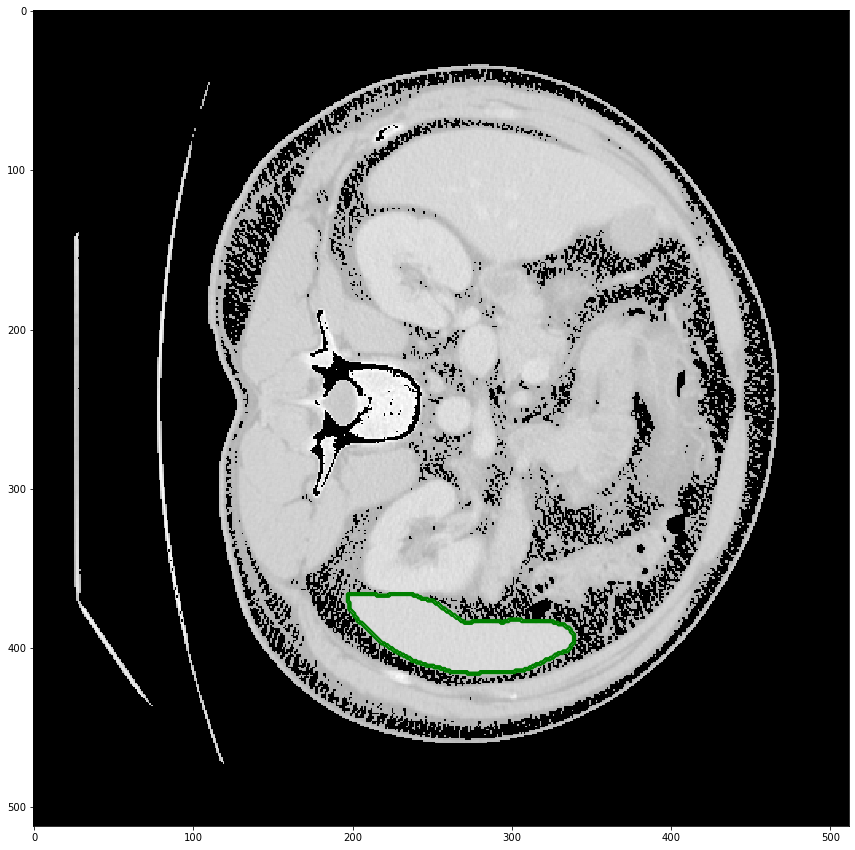

63


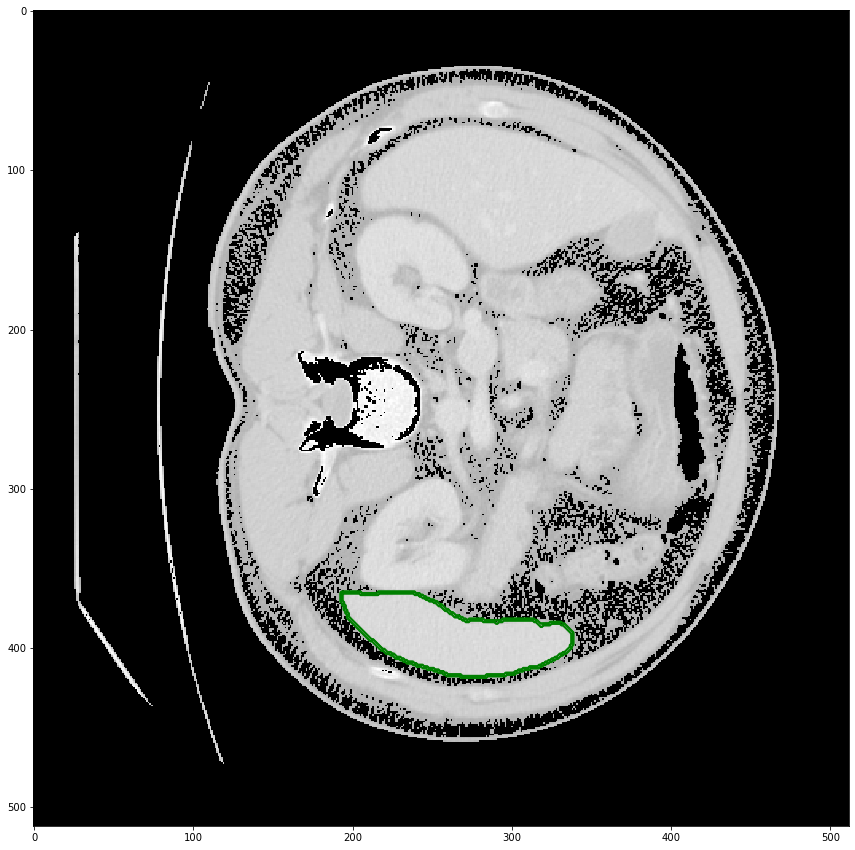

64


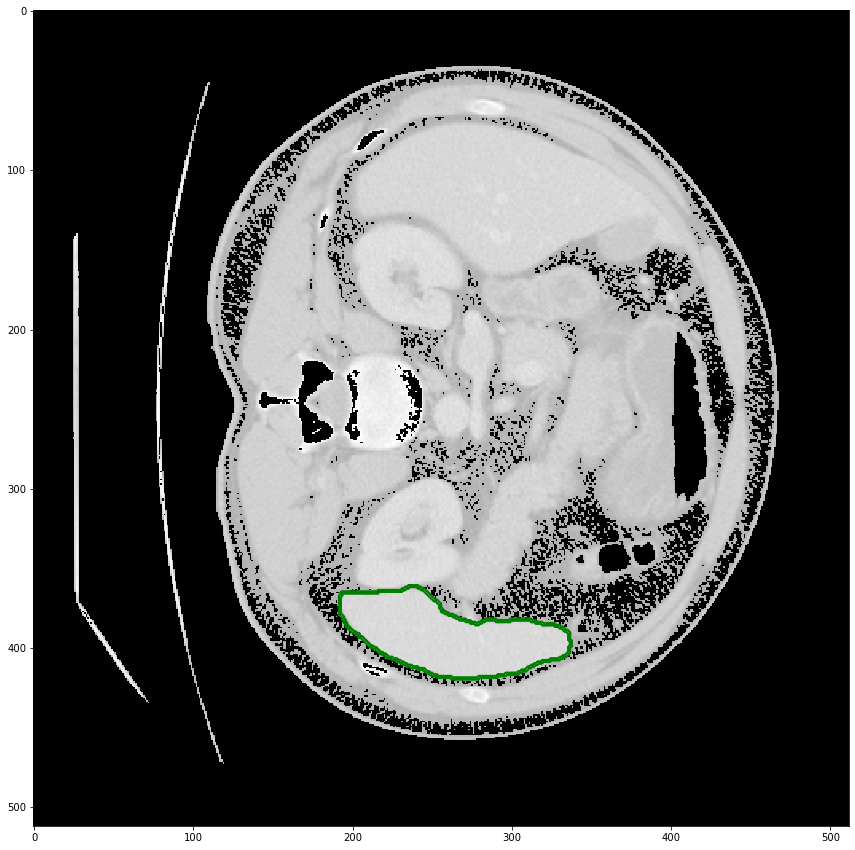

65


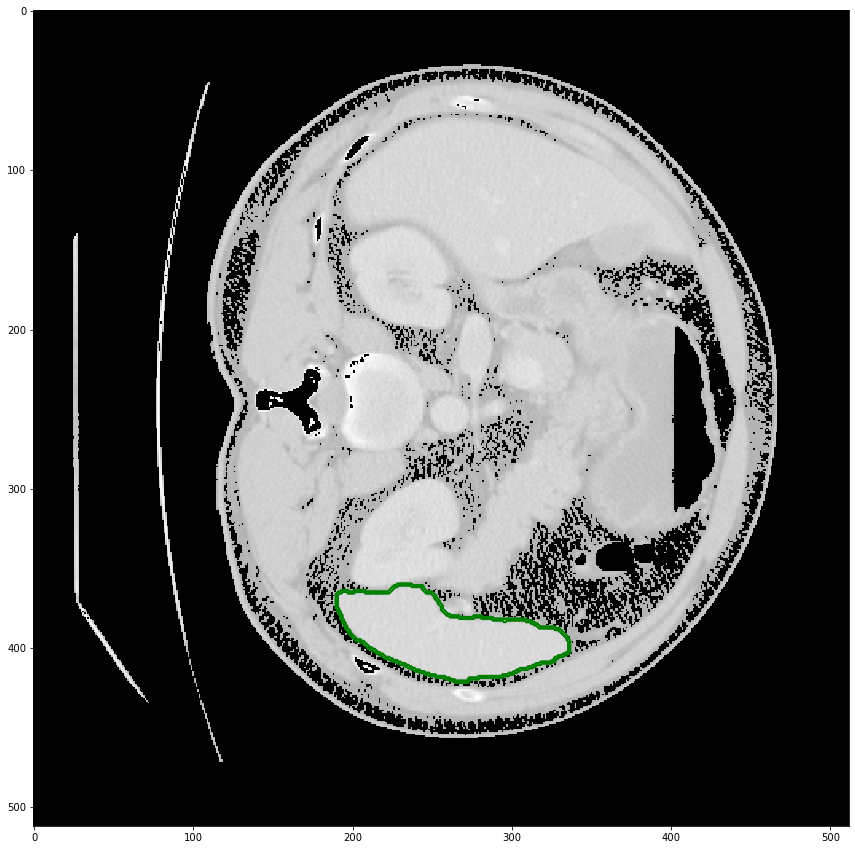

66


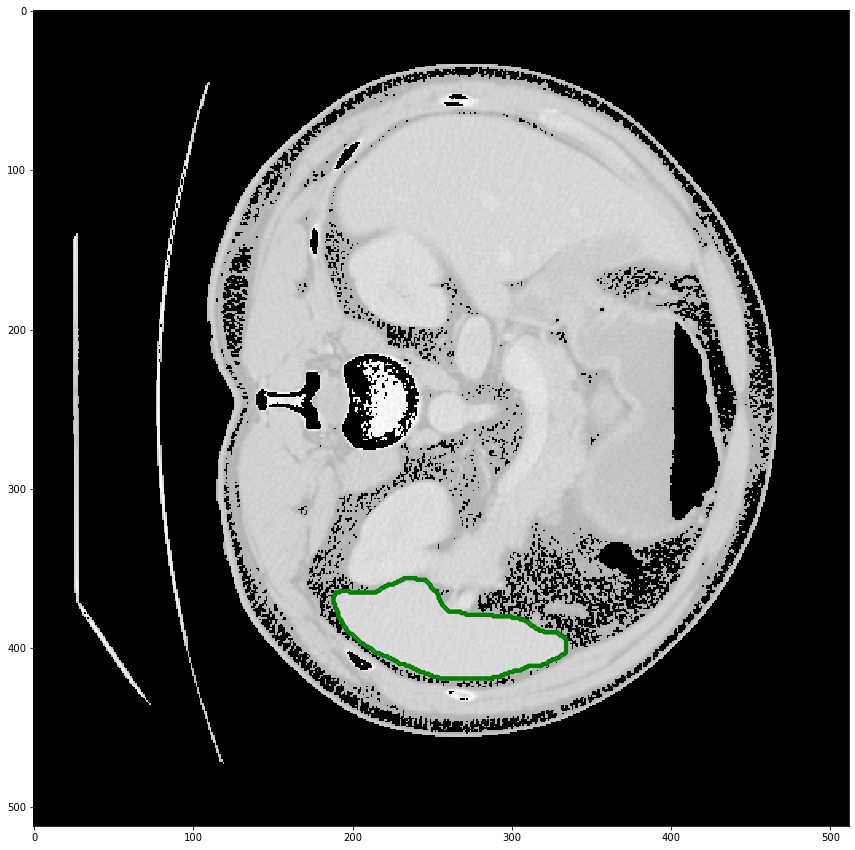

67


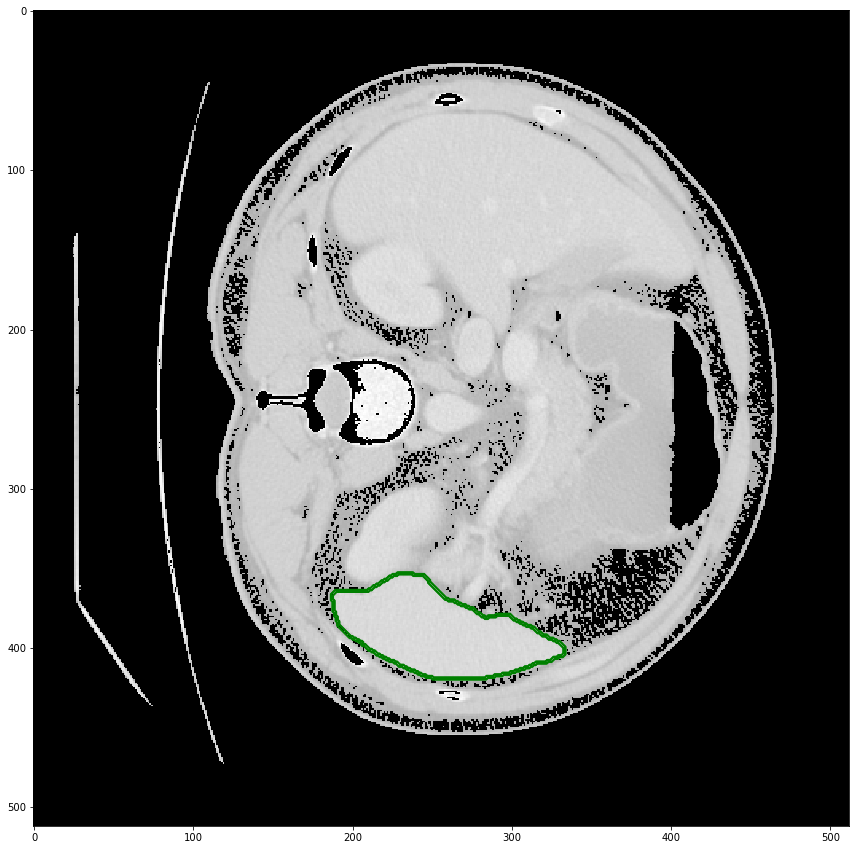

68


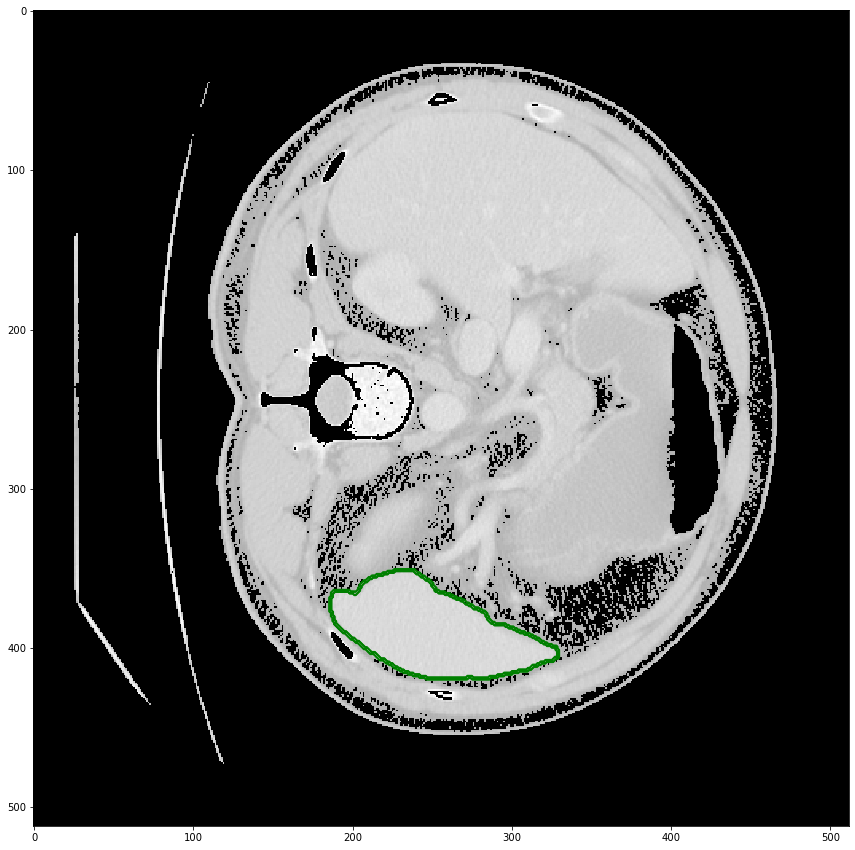

69


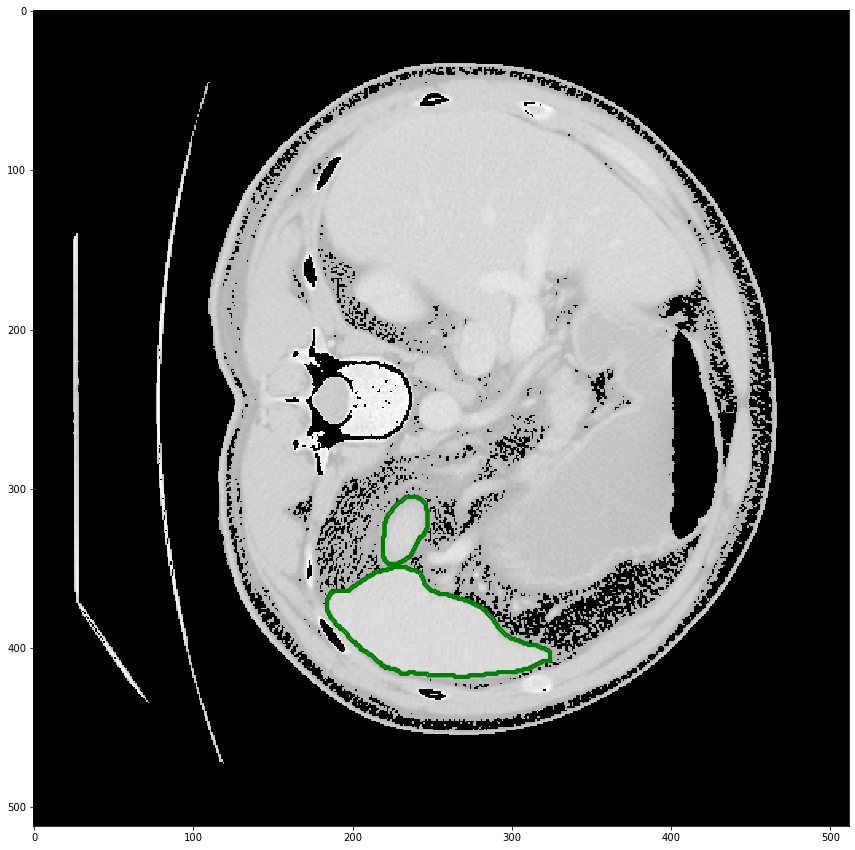

70


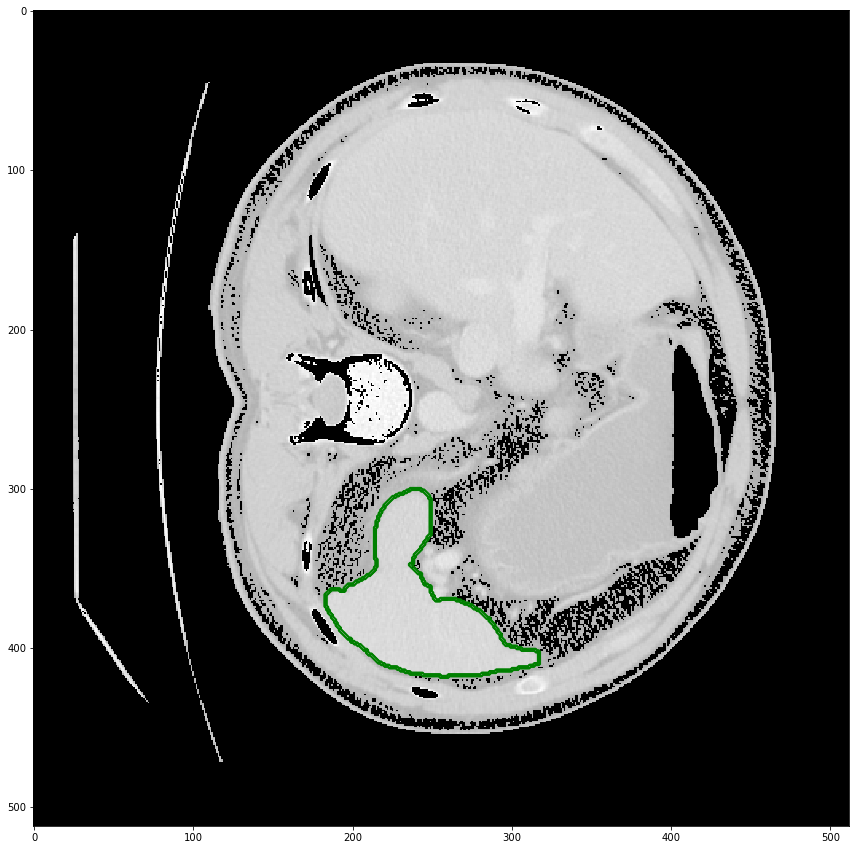

71


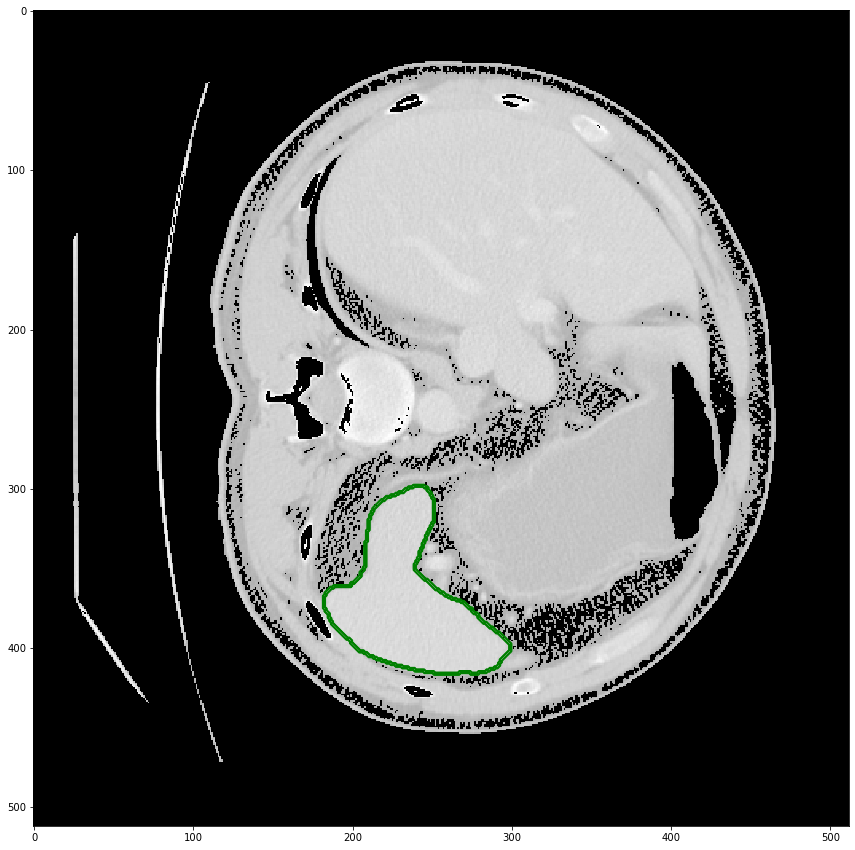

72


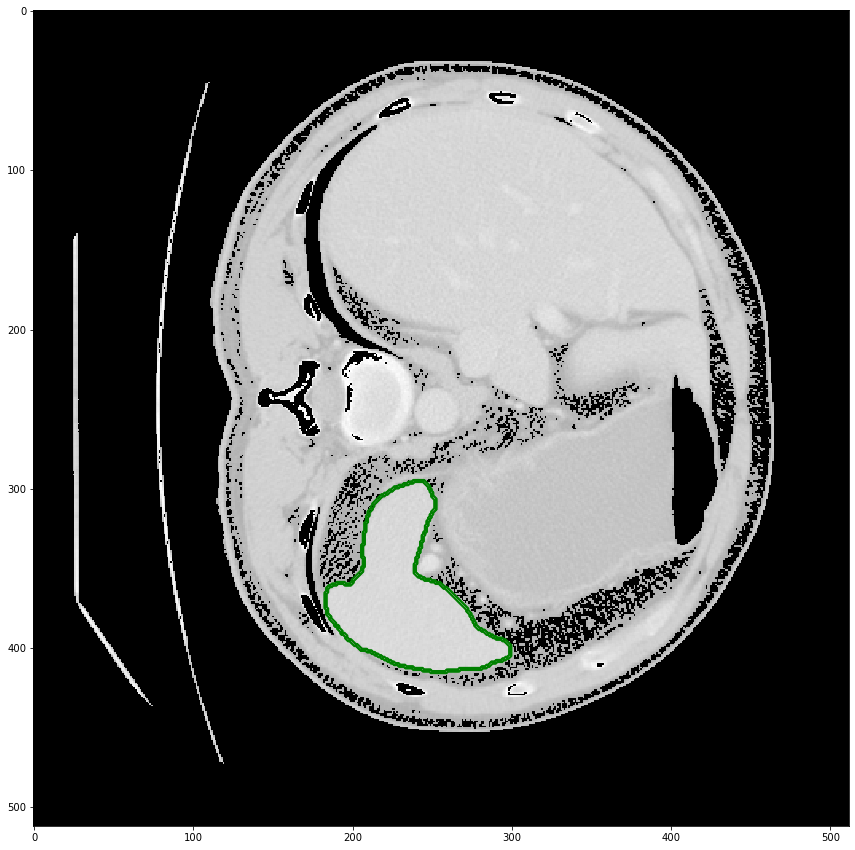

73


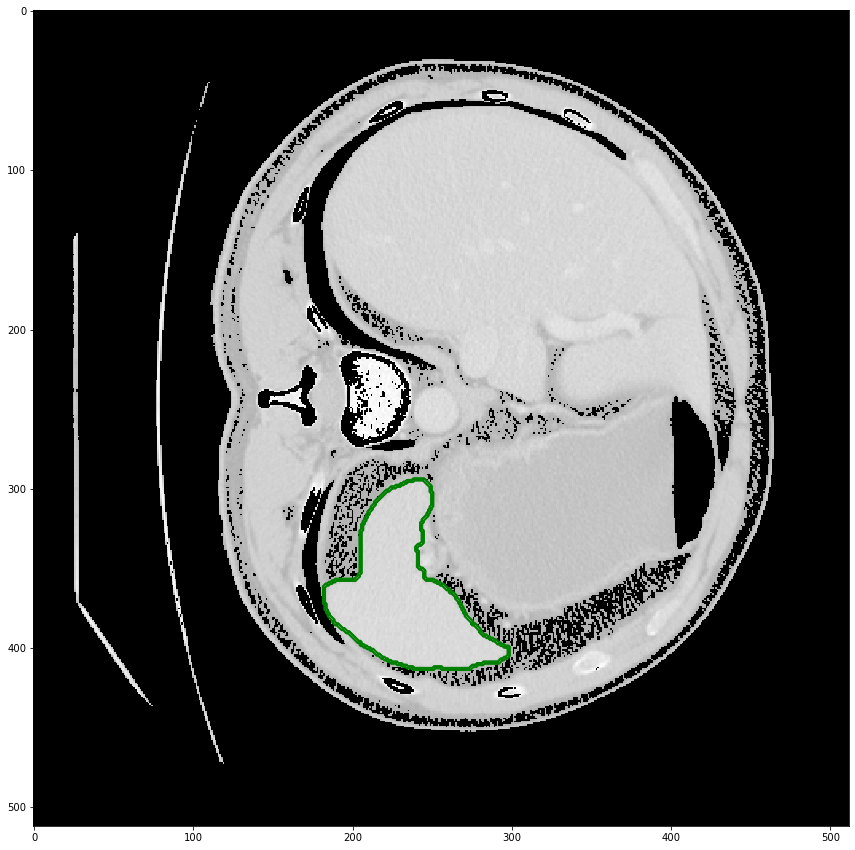

74


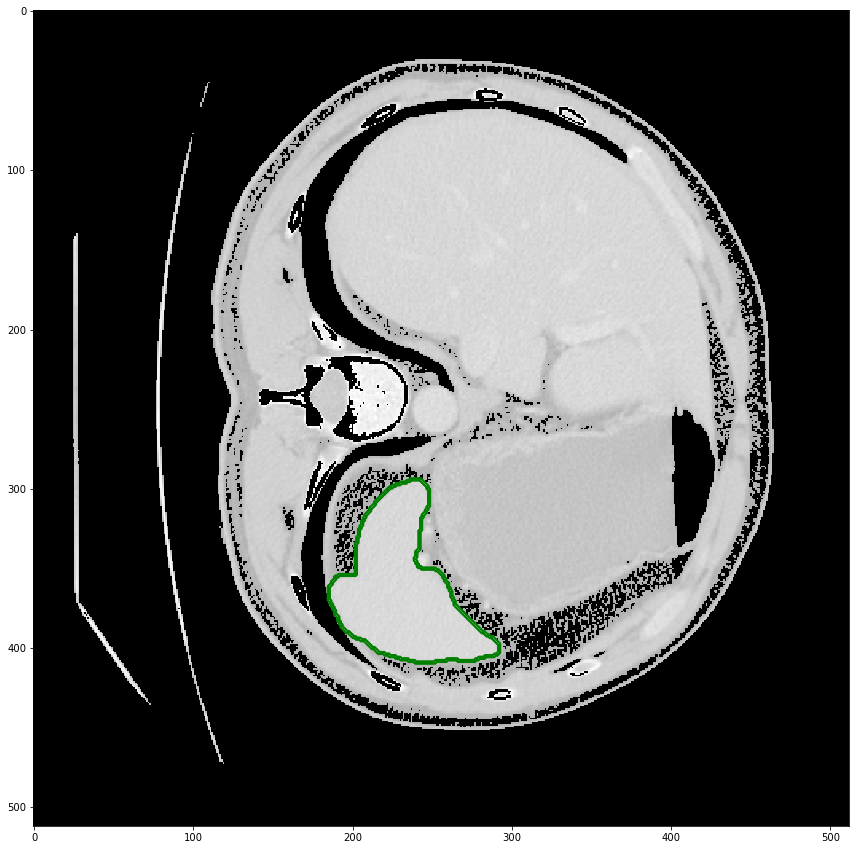

75


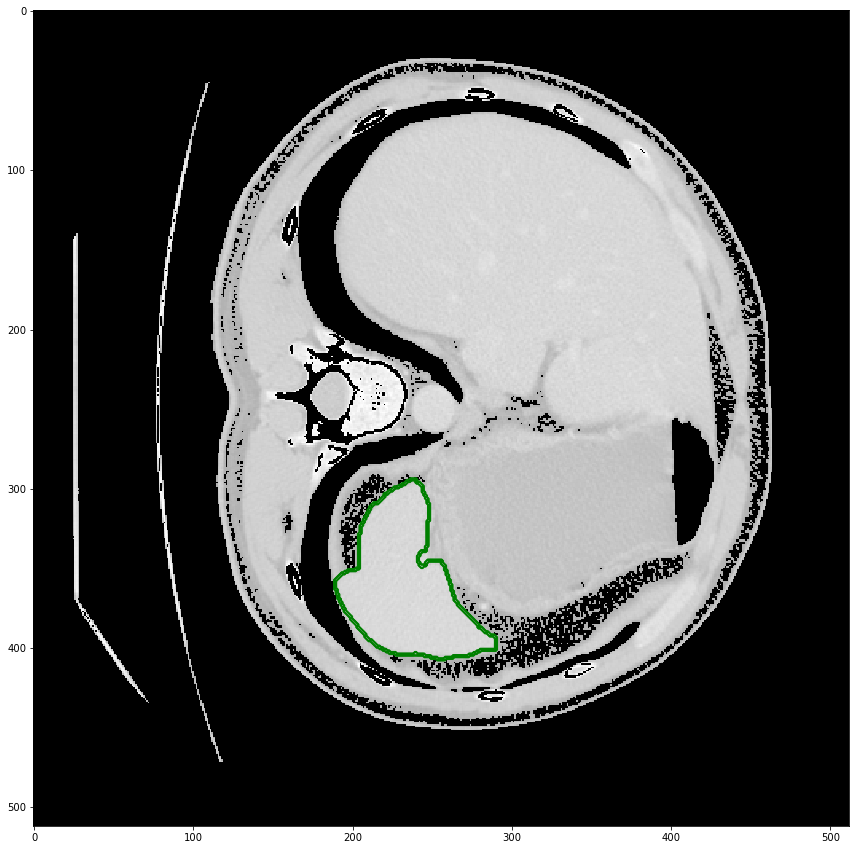

76


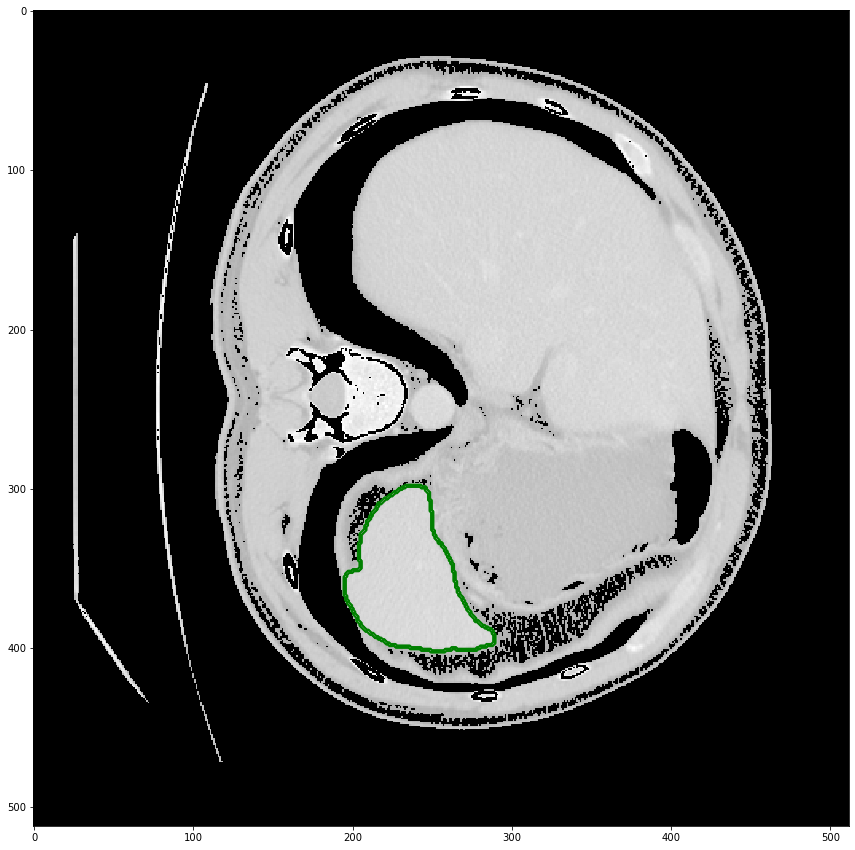

77


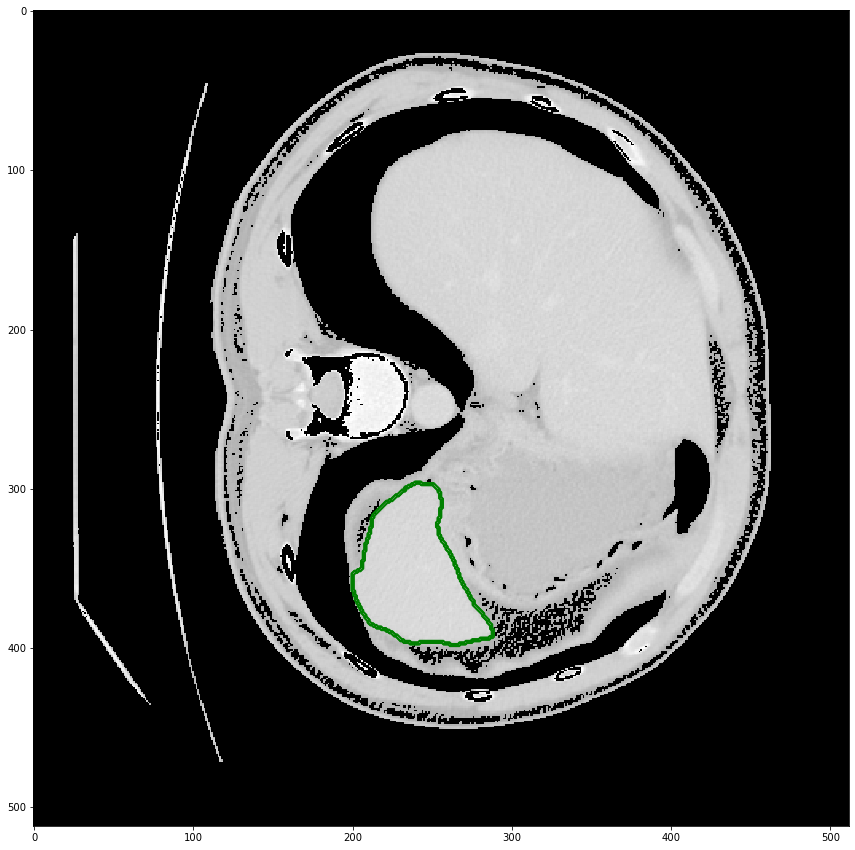

78


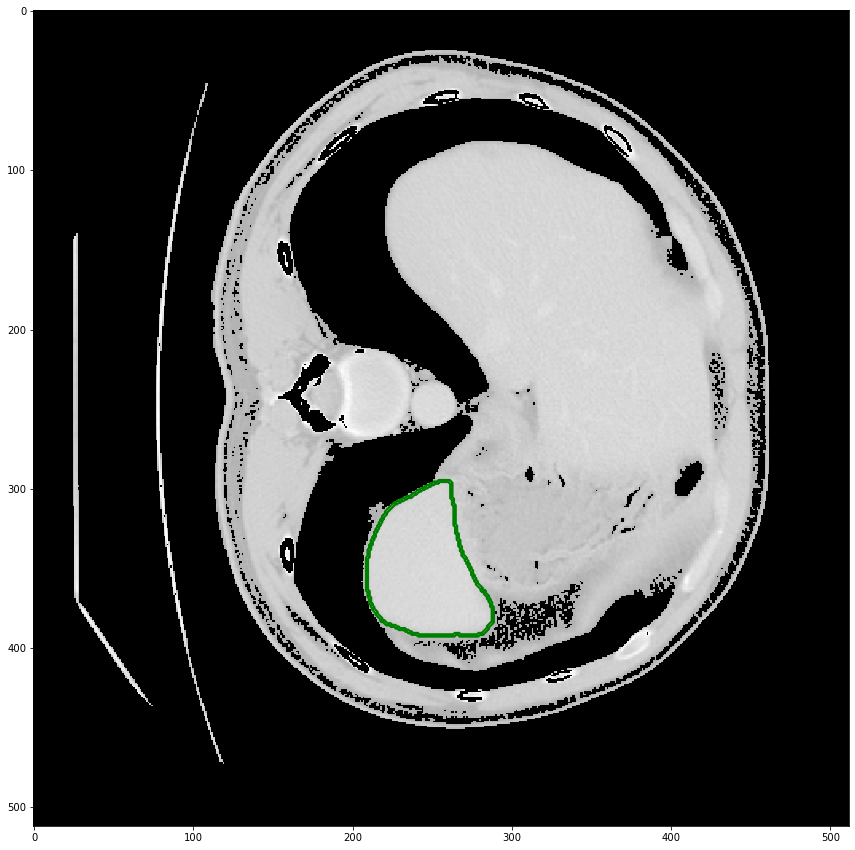

79


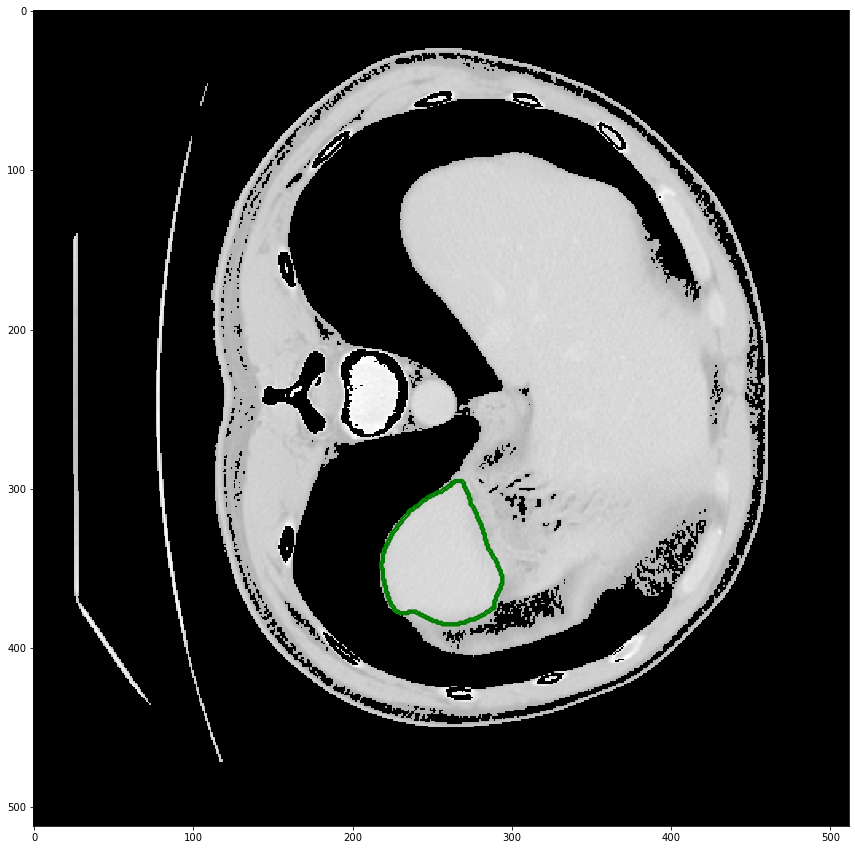

80


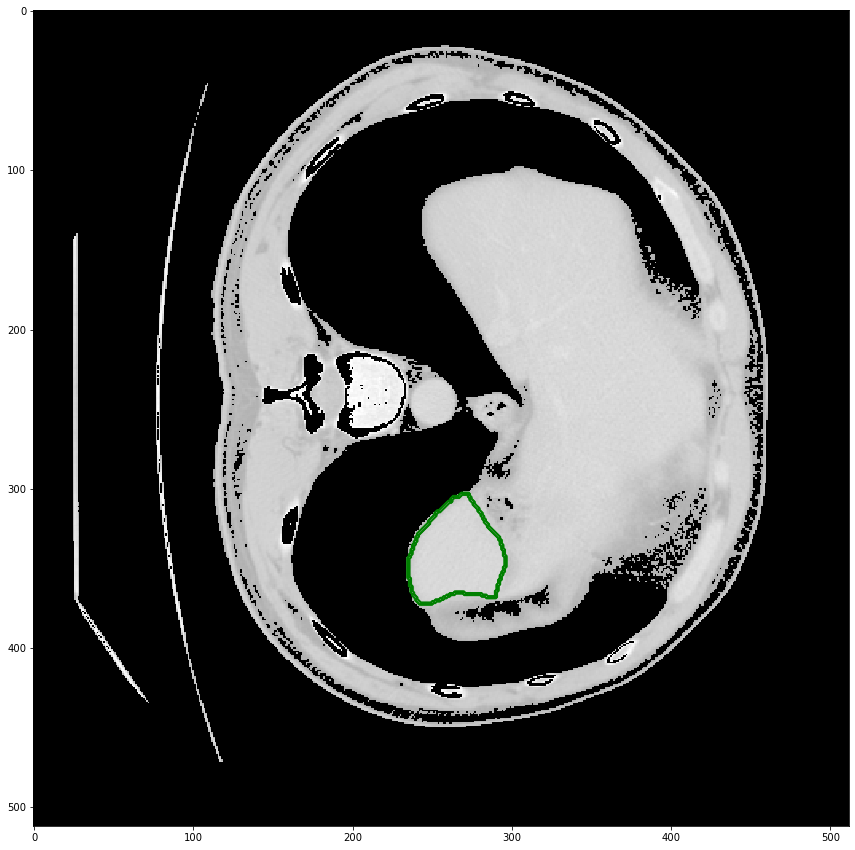

81


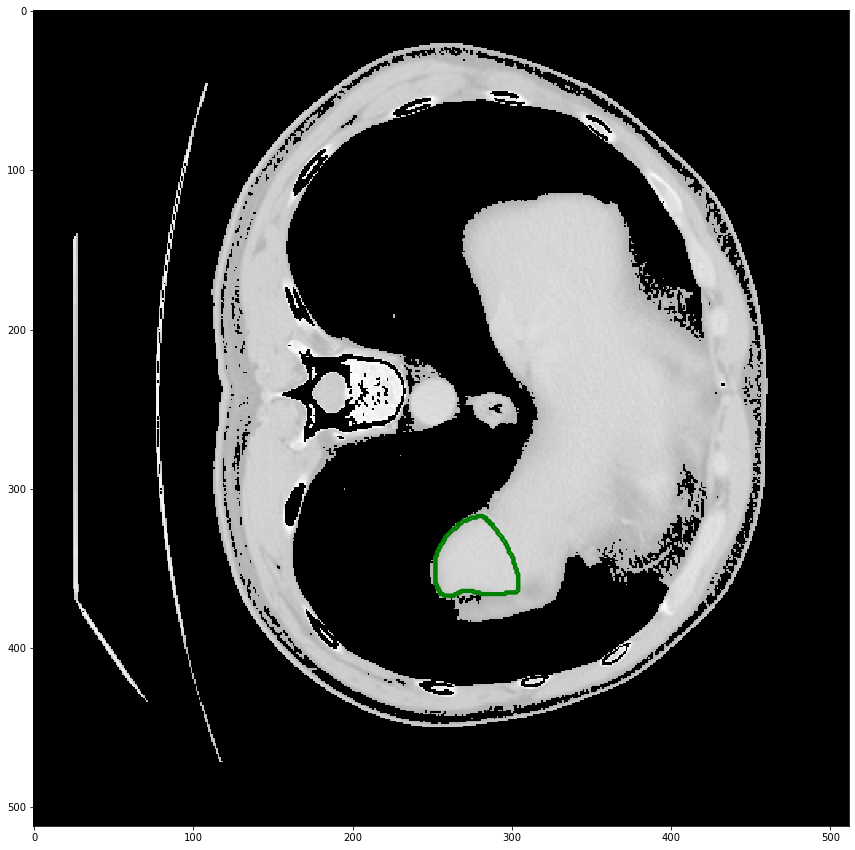

82


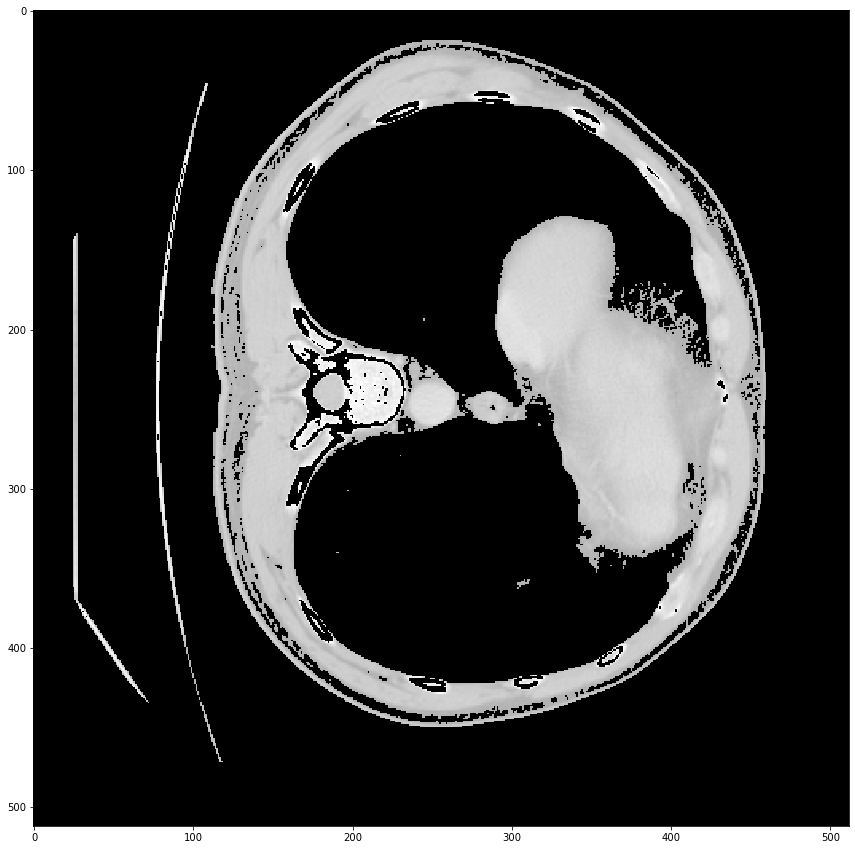

83


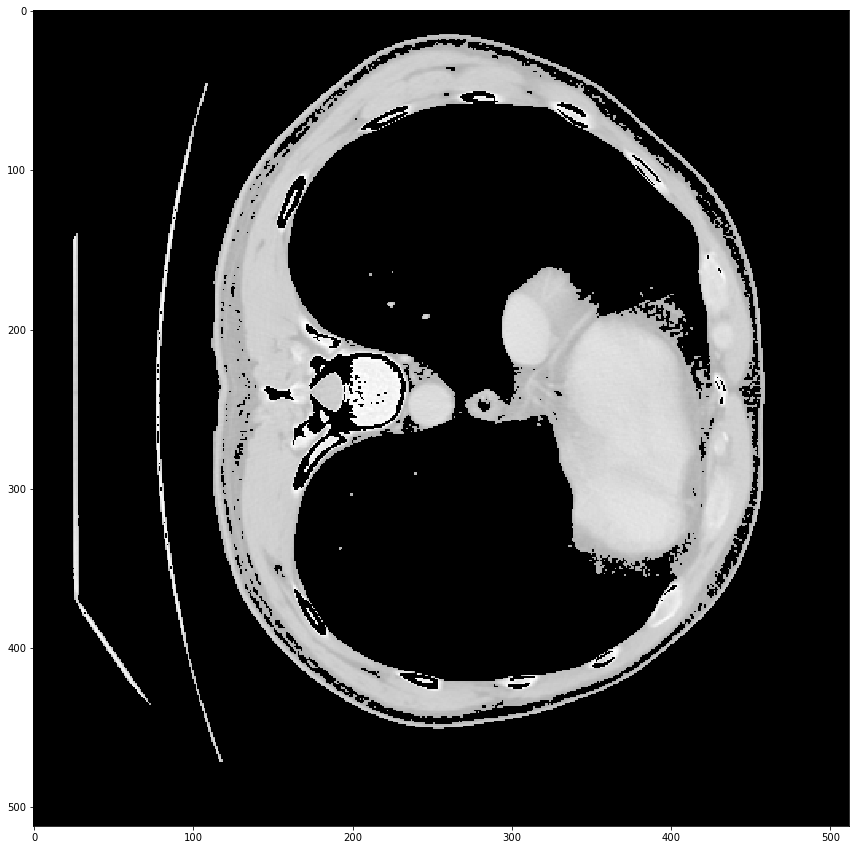

84


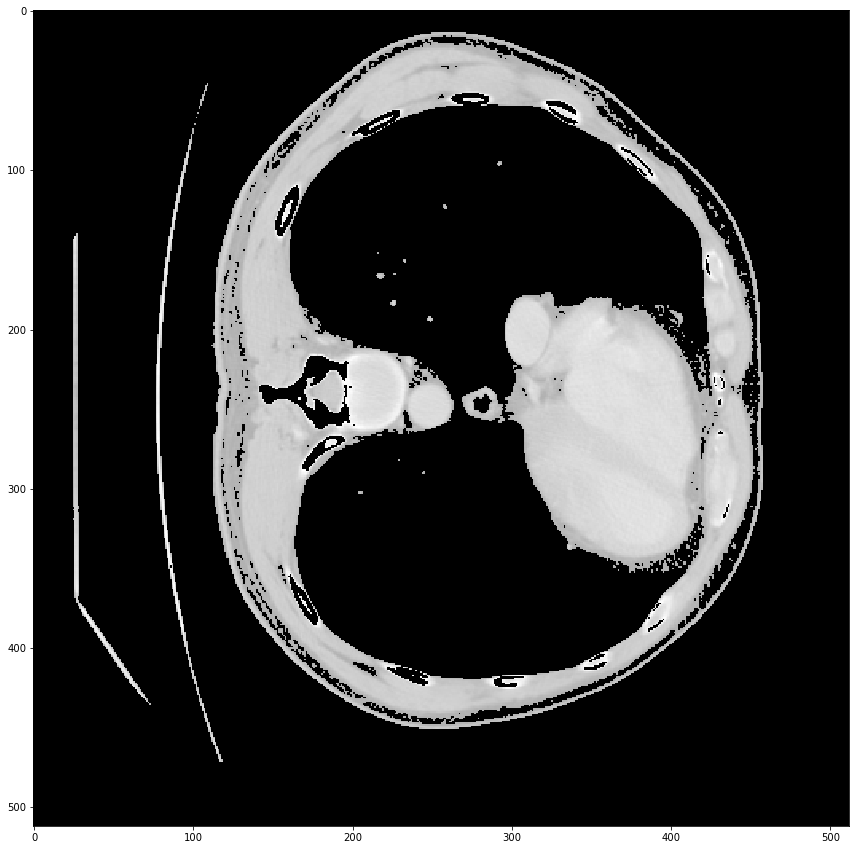

85


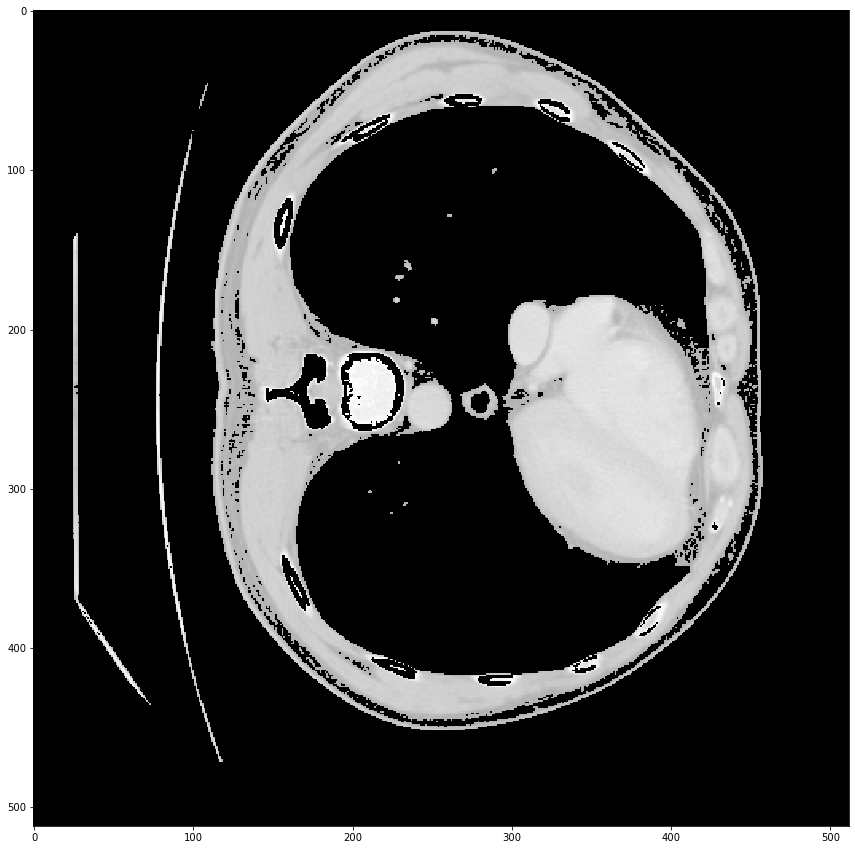

86


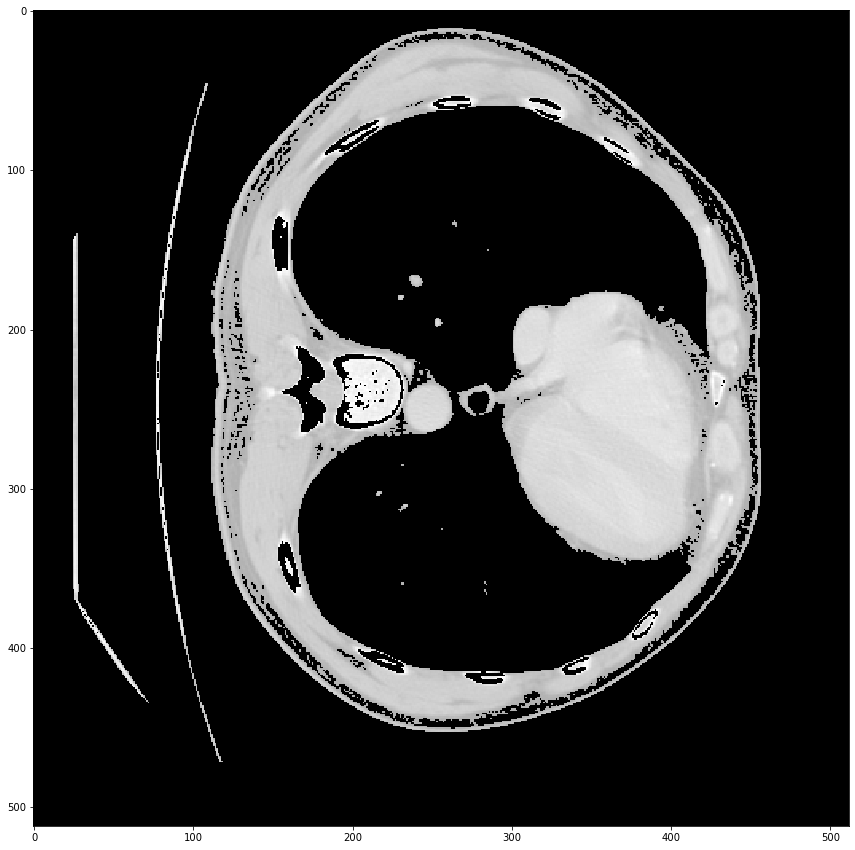

87


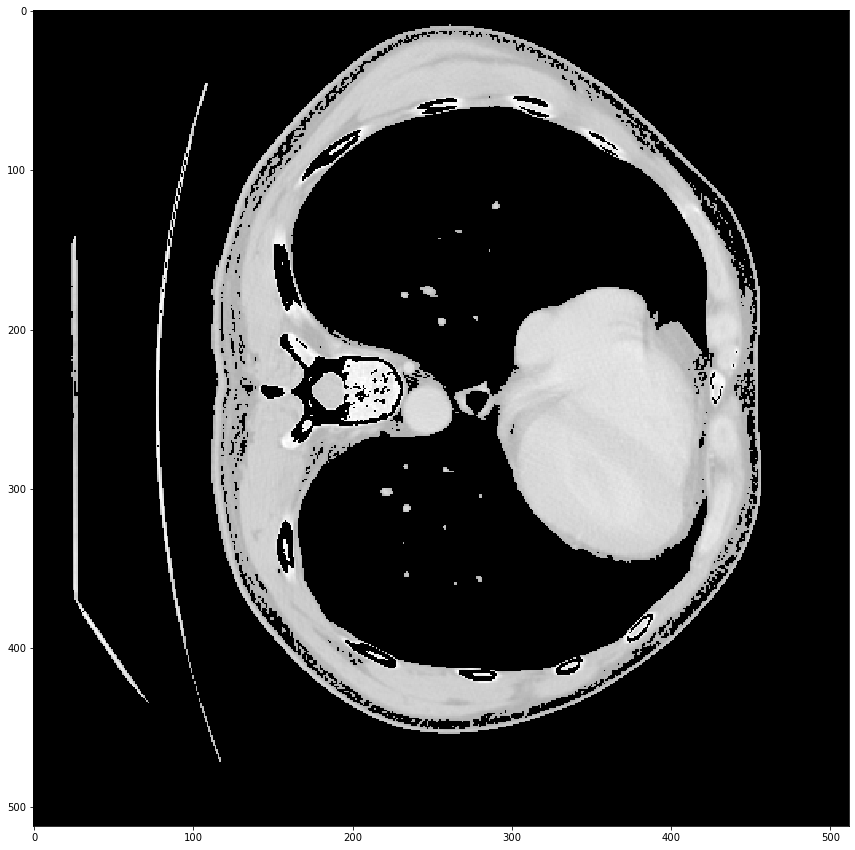

88


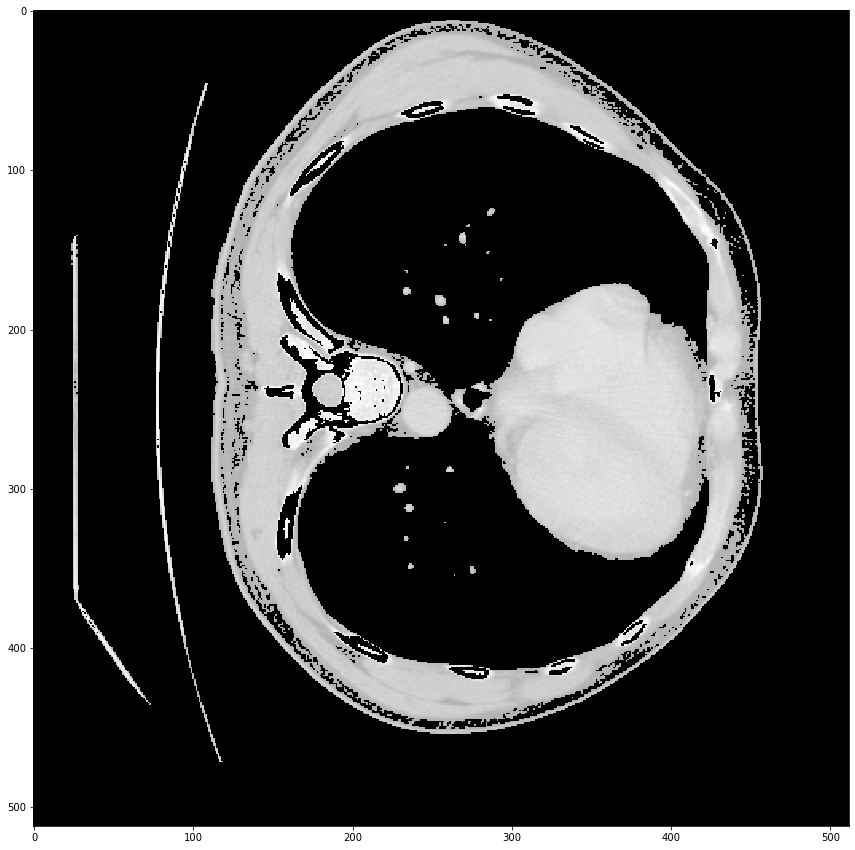

In [54]:
for ind in range(50,89,1):
    print(ind)
    plt.figure(figsize=(15,15))
    plt.imshow(img_np_norm_tr[ind],cmap='gray')
    label_np_tr_sp = label_np_tr[ind].copy()
    label_np_tr_sp[label_np_tr_sp!=1]=0
    label_np_tr_sp_ol = (roberts(label_np_tr_sp > label_np_tr_sp.max() / 2) * 255).astype(np.uint8)
    plt.contour(label_np_tr_sp_ol, colors='green', linewidths=1)
    plt.show()